In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("D:\\EduNet\\NSTI_Indore25_26\\Data Science\\StudentPerformanceFactors.csv")

In [3]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [6]:
# What is the average Exam_Score of the students?
df['Exam_Score'].mean()

67.23565914938702

In [9]:
# Does Attendance have any relationship with Exam_Score?
df[['Exam_Score','Attendance']].corr()*100

,Exam_Score,Attendance
Exam_Score,100.000000,58.107186
Attendance,58.107186,100.000000


In [11]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Score')

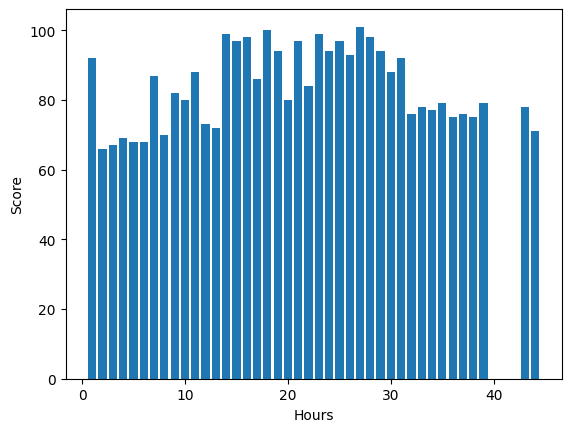

In [16]:
# Do students who study more hours score higher in exams?
# df[['Hours_Studied','Exam_Score']]

plt.bar(df['Hours_Studied'],df['Exam_Score'])
plt.xlabel("Hours")
plt.ylabel("Score")

In [21]:
# Compare Exam_Score of students from Public vs Private schools.
# df['Exam_Score'].mean()
df.groupby(['School_Type'])['Exam_Score'].mean()

School_Type
Private    67.287705
Public     67.212919
Name: Exam_Score, dtype: float64

In [22]:
# How does Parental_Involvement (Low/Medium/High) affect Exam_Score?

df.groupby(['Parental_Involvement'])['Exam_Score'].mean()

Parental_Involvement
High      68.092767
Low       66.358265
Medium    67.098156
Name: Exam_Score, dtype: float64

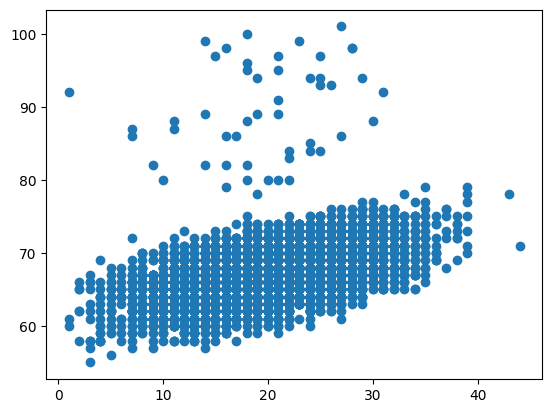

In [23]:
plt.scatter(x=df['Hours_Studied'],y=df['Exam_Score'])

<Axes: title={'center': 'Exam_Score'}, xlabel='School_Type'>

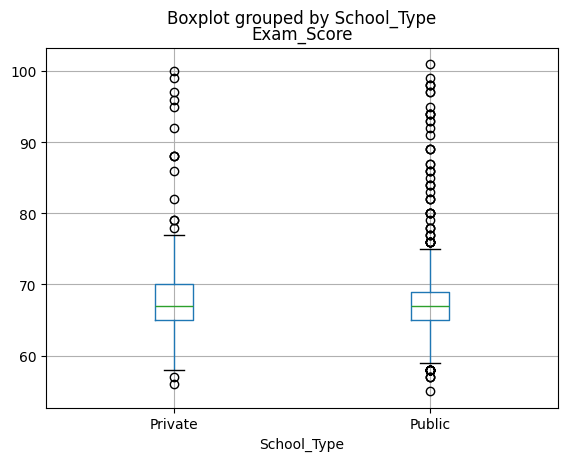

In [36]:
# Create a box plot of Exam_Score grouped by School_Type

# (df.groupby(['School_Type'])['Exam_Score'].mean())
# plt.boxplot(x=df['School_Type'],y=df['Exam_Score'])

df.boxplot(column='Exam_Score',by='School_Type')

In [41]:
# Is Previous_Scores a good predictor of Exam_Score?

# df['Previous_Scores'].mean()
# df['Exam_Score'].mean()

df[['Exam_Score','Previous_Scores']].corr()*100

# df['Exam_Score'].mean() - df['Previous_Scores'].mean()

,Exam_Score,Previous_Scores
Exam_Score,100.000000,17.507909
Previous_Scores,17.507909,100.000000


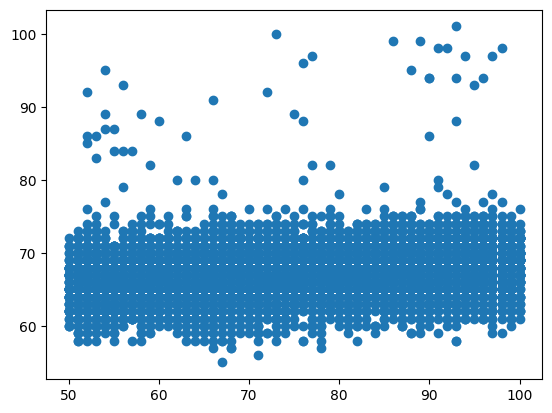

In [42]:
plt.scatter(x=df['Previous_Scores'],y=df['Exam_Score'])

In [44]:
# Does Sleep_Hours impact Exam_Score positively or negatively?
df[['Sleep_Hours','Exam_Score']].corr()*100

,Sleep_Hours,Exam_Score
Sleep_Hours,100.000000,-1.702163
Exam_Score,-1.702163,100.000000


In [46]:
numericColoumns = df.select_dtypes('number')
numericColoumns.corr()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
Hours_Studied,1.000000,-0.009908,0.010977,0.024846,-0.014282,0.004624,0.445455
Attendance,-0.009908,1.000000,-0.015918,-0.020186,0.014324,-0.022435,0.581072
Sleep_Hours,0.010977,-0.015918,1.000000,-0.021750,-0.012216,-0.000378,-0.017022
Previous_Scores,0.024846,-0.020186,-0.021750,1.000000,-0.013122,-0.011274,0.175079
Tutoring_Sessions,-0.014282,0.014324,-0.012216,-0.013122,1.000000,0.017733,0.156525
Physical_Activity,0.004624,-0.022435,-0.000378,-0.011274,0.017733,1.000000,0.027824
Exam_Score,0.445455,0.581072,-0.017022,0.175079,0.156525,0.027824,1.000000


In [47]:
import seaborn as sns

<Axes: >

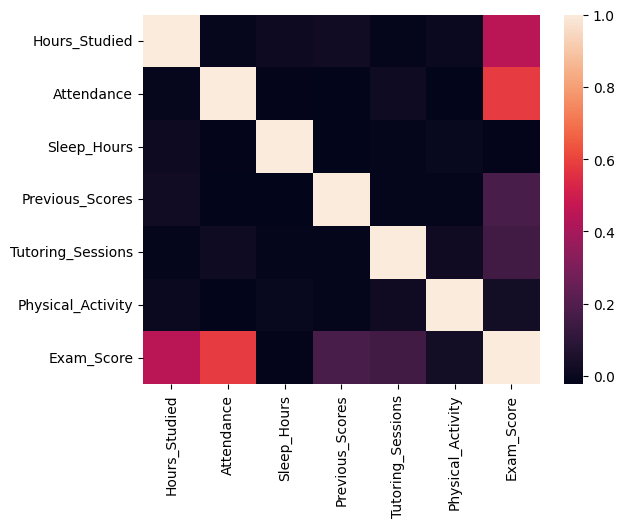

In [48]:
sns.heatmap(numericColoumns.corr())